In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()

In [3]:
data = pd.read_csv('AMZN.csv',header=0, 
           usecols = ['Date','Close'],parse_dates=True,
           index_col='Date')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-07-17 to 2023-07-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [5]:
data.head()

,Close
Date,
2013-07-17,15.4345
2013-07-18,15.2055
2013-07-19,15.2615
2013-07-22,15.1740
2013-07-23,15.0530


In [6]:
data.tail()

,Close
Date,
2023-07-10,127.129997
2023-07-11,128.779999
2023-07-12,130.800003
2023-07-13,134.300003
2023-07-14,134.679993


In [7]:
data.describe()

,Close
count,2516.000000
mean,78.780115
std,51.858717
min,14.046500
25%,29.900374
50%,80.972000
75%,115.002500
max,186.570496


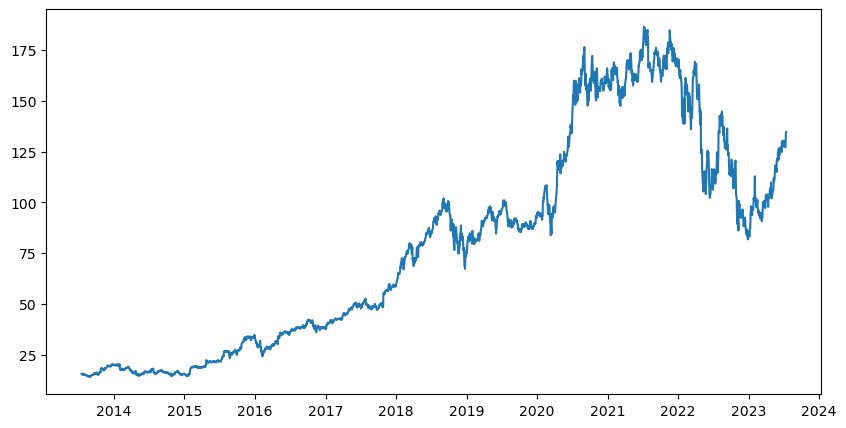

In [8]:
plt.figure(figsize=(10,5))
plt.plot(data)
plt.show()

In [9]:
amzn_pct_change = data.pct_change()

In [10]:
log_rtrns = np.log(1 + amzn_pct_change)
log_rtrns.tail(10)

,Close
Date,
2023-06-30,0.019051
2023-07-03,-0.001075
2023-07-05,0.001228
2023-07-06,-0.015614
2023-07-07,0.011002
2023-07-10,-0.020631
2023-07-11,0.012895
2023-07-12,0.015564
2023-07-13,0.026407


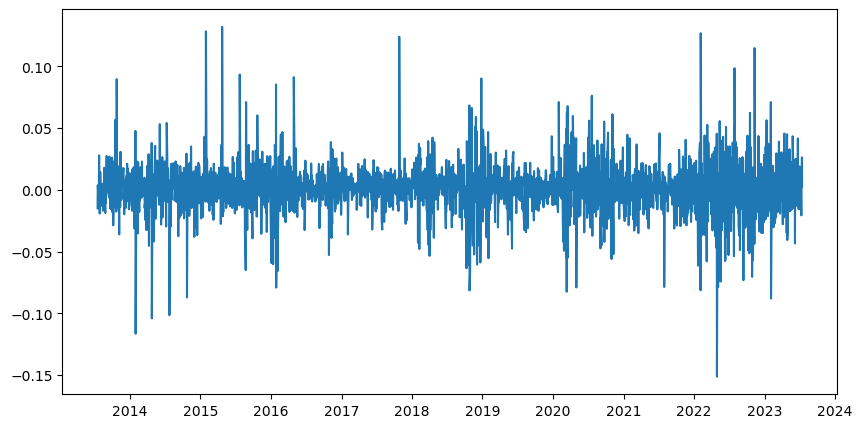

In [11]:
plt.figure(figsize=(10,5))
plt.plot(log_rtrns)
plt.show()

In [12]:
mean_log_returns = np.array(log_rtrns.mean())
var_log_returns = np.array(log_rtrns.var()) 
stdev_log_returns = np.array(log_rtrns.std())

In [13]:
drift = mean_log_returns - (0.5 * var_log_returns)
print("Drift = ",drift)

Drift =  [0.00064624]


In [14]:
num_intervals = 2516
iterations = 20

In [15]:
np.random.seed(17)

In [16]:
SBMotion = norm.ppf(np.random.rand(num_intervals, iterations))

In [17]:
daily_returns = np.exp(drift + stdev_log_returns * SBMotion)

In [18]:
start_prices = data.iloc[0]

In [19]:
stock_price = np.zeros_like(daily_returns)

In [20]:
stock_price[0] = start_prices

In [21]:
for t in range(1, num_intervals):
    stock_price[t] = stock_price[t - 1] * daily_returns[t]

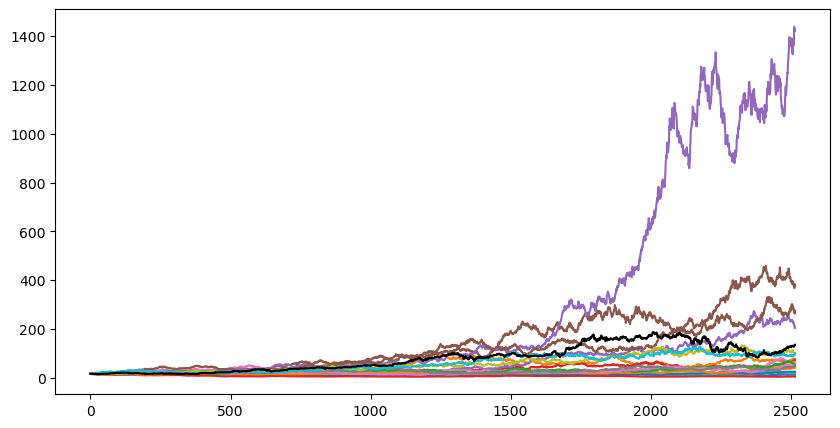

In [25]:
plt.figure(figsize=(10,5))
plt.plot(stock_price)   
trend = np.array(data.iloc[:, 0:1])
plt.plot(trend,'k')   
plt.show()